## Estadistica Aplicada 

Sesion 7 - 5 septiembre 

Ana Sofia Saucedo Garcia
Grupo 42

In [1]:
#Librerias basicas

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 



In [3]:
pip install lifelines


  Using cached lifelines-0.27.7-py3-none-any.whl (409 kB)
  Using cached autograd-1.6.2-py3-none-any.whl (49 kB)
  Using cached autograd-gamma-0.5.0.tar.gz (4.0 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached formulaic-0.6.4-py3-none-any.whl (88 kB)
                                              0.0/840.9 kB ? eta -:--:--
     -----                                  112.6/840.9 kB 2.2 MB/s eta 0:00:01
     ------------                           286.7/840.9 kB 3.0 MB/s eta 0:00:01
     ------------------------               532.5/840.9 kB 3.7 MB/s eta 0:00:01
     -------------------------------------  839.7/840.9 kB 5.3 MB/s eta 0:00:01
     -------------------------------------  839.7/840.9

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#Libreria especializada

from lifelines import ExponentialFitter


In [6]:
# Importar los datos 

recaida= pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')

In [7]:
recaida

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


In [10]:
# ExponentialFitter().fit(tiempo sup,censura/evento)
exp = ExponentialFitter().fit(recaida[' tiempo'],recaida[' estado'])

In [12]:
pip install jinja2

                                              0.0/133.1 kB ? eta -:--:--
     --------------------------------       112.6/133.1 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 133.1/133.1 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
exp.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 10 total observations, 4 right-censored observations>
   number of observations = 10
number of events observed = 6
           log-likelihood = -26.41
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.00      12.25             6.00            54.00

          cmp to    z    p   -log2(p)
lambda_     0.00 2.45 0.01       6.13
---
AIC = 54.81

In [14]:
# a) tasa de riesgo 
exp.hazard_

,Exponential_estimate
5.0,0.033333
8.0,0.033333
11.0,0.033333
14.0,0.033333
17.0,0.033333
20.0,0.033333
23.0,0.033333
26.0,0.033333
29.0,0.033333
32.0,0.033333


(0.0, 0.5)

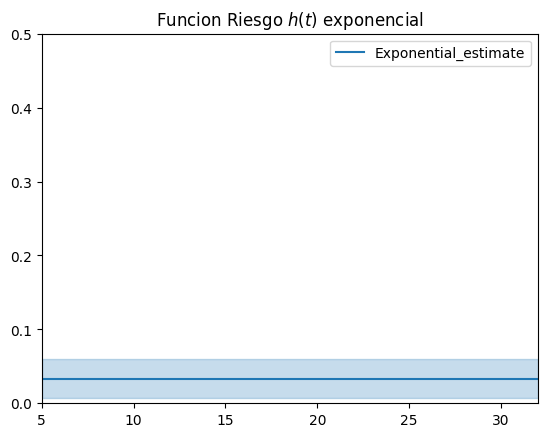

In [20]:
# graficar h(t)
exp.plot_hazard();
plt.title('Funcion Riesgo $h(t)$ exponencial')
plt.xlim(5,32)
plt.ylim(0,0.5)

In [22]:
# b) probabilidad no recaer a 16 meses S(16)

exp.survival_function_at_times(16)

16    0.586646
Name: Exponential_estimate, dtype: float64

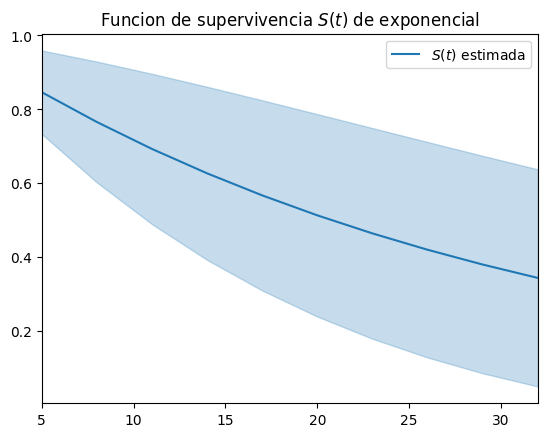

In [27]:
# Grafica de la funcion de supervivencia 

exp.plot_survival_function(label='$S(t)$ estimada')
plt.title('Funcion de supervivencia $S(t)$ de exponencial')
plt.xlim(5,32);


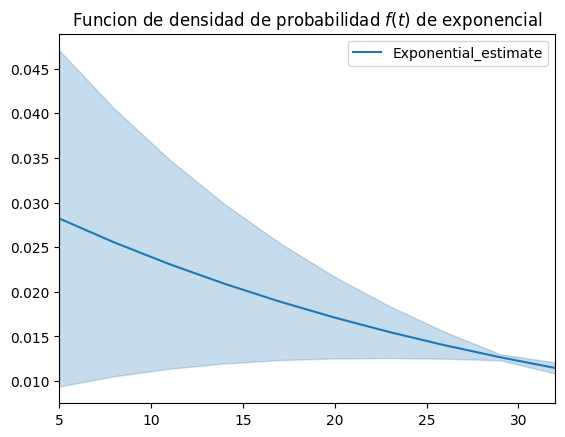

In [31]:
# f(t) funcion de densidad de probabilidad 

exp.plot_density()
plt.title('Funcion de densidad de probabilidad $f(t)$ de exponencial')
plt.xlim(5,32);

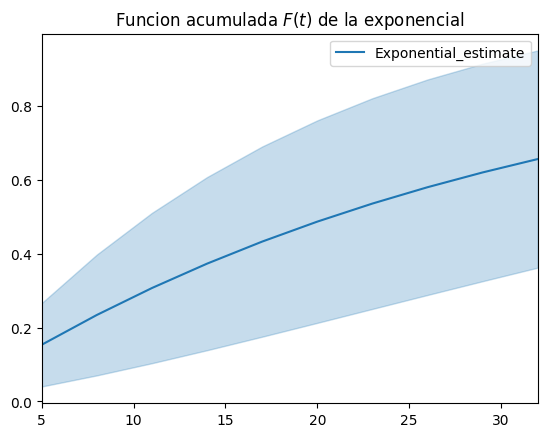

In [33]:
## F(t) acumulada

exp.plot_cumulative_density()
plt.title('Funcion acumulada $F(t)$ de la exponencial')
plt.xlim(5,32);

Vamos a suponer que tiempo de supervivencia de los datos se distribuyen como una weibull 

In [34]:
from lifelines import WeibullFitter

In [35]:
# WeibullFitter().fit(tiempo sup,evento/censura)

mweibull = WeibullFitter().fit(recaida[' tiempo'],recaida[' estado'])

In [37]:
# parametro gamma 
mweibull.rho_

1.8867259500116444

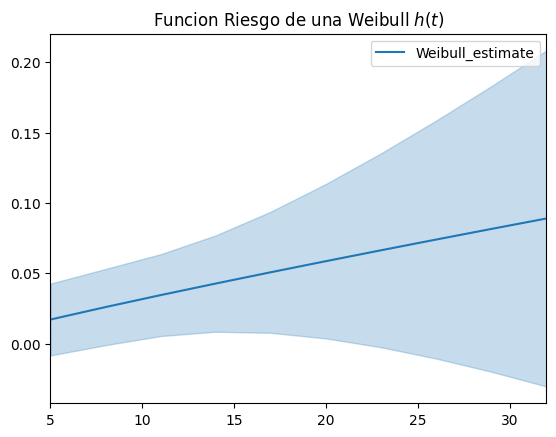

In [40]:
mweibull.plot_hazard()
plt.title('Funcion Riesgo de una Weibull $h(t)$')
plt.xlim(5,32);

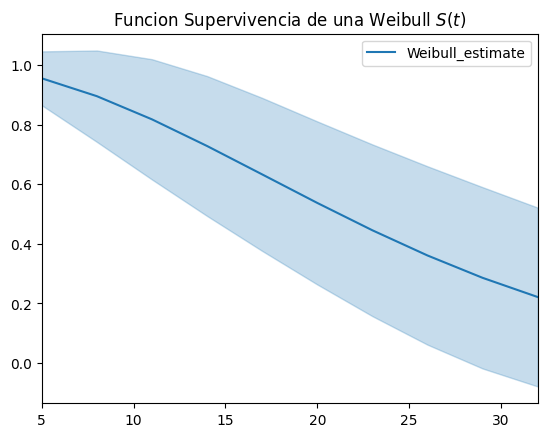

In [42]:
# Funcion de supervivencia de weibull 

mweibull.plot_survival_function()
plt.title('Funcion Supervivencia de una Weibull $S(t)$')
plt.xlim(5,32);


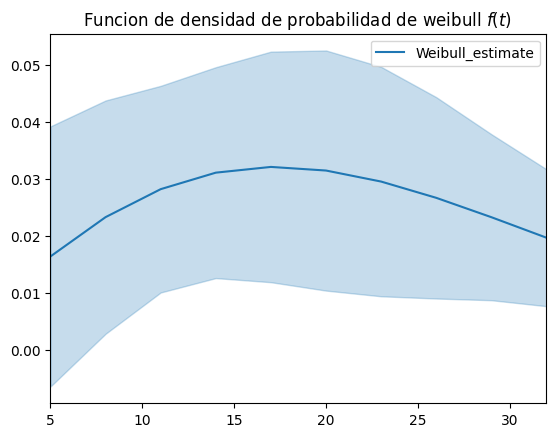

In [44]:
# f(t) weibull

mweibull.plot_density()
plt.title('Funcion de densidad de probabilidad de weibull $f(t)$ ')
plt.xlim(5,32);

Suponer que tiempo de supervivencia de los datos se distribuyen como log-normal 

In [45]:
from lifelines import LogNormalFitter

In [47]:
mlogn = LogNormalFitter().fit(recaida[' tiempo'],recaida[' estado'])

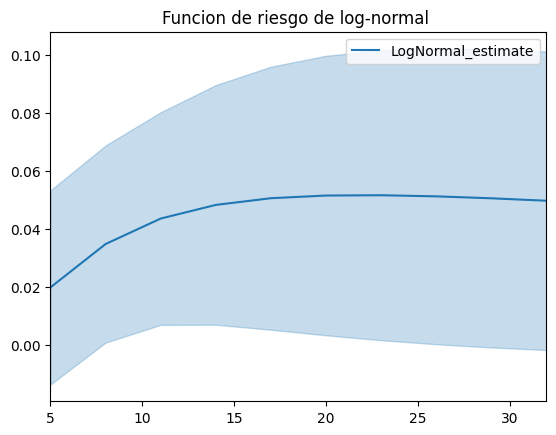

In [48]:
# Riesgo log normal 

mlogn.plot_hazard()
plt.title('Funcion de riesgo de log-normal ')
plt.xlim(5,32);

In [49]:
mlogn.hazard_

,LogNormal_estimate
5.0,0.019961
8.0,0.034916
11.0,0.043704
14.0,0.048408
17.0,0.050720
20.0,0.051641
23.0,0.051744
26.0,0.051361
29.0,0.050690
32.0,0.049850


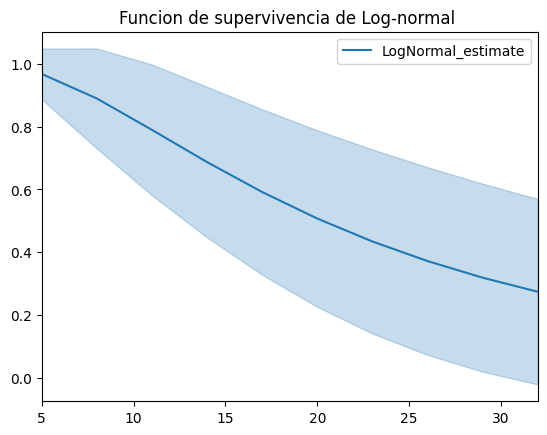

In [50]:
# Funcion de supervivencia  log normal 

mlogn.plot_survival_function()
plt.title('Funcion de supervivencia de Log-normal ')
plt.xlim(5,32);

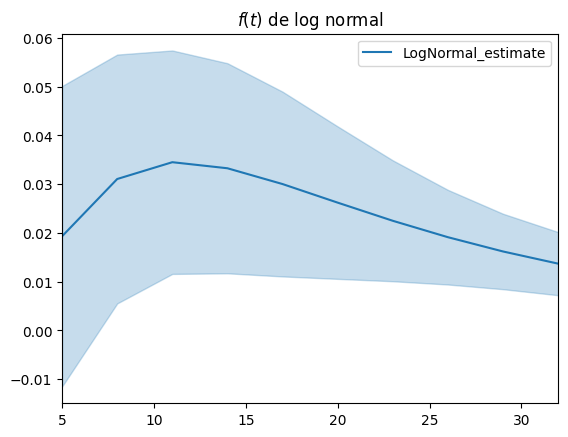

In [51]:
# Funcion de densidad de probabilidad de log normal 

mlogn.plot_density()
plt.title('$f(t)$ de log normal')
plt.xlim(5,32);

¿ El tiempo de supervivencia de la recaida es exponencial, weibull o log normal? 

El crtierio de Akaike (Akaike Information Criteria AIC) sirve para elegir el "mejor" modelo. 
$AIC = -ln(Verosimilitud)+ 2k $ donde k es el numero de parametros del modelo de regresión. El mejor modelo es el que tiene el menor valor de AIC.

AIC prefiere modelos mas simples

In [55]:
print('Exponencial:', exp.AIC_.round(2) ,', Weibull:', mweibull.AIC_.round(2), ', Log-Normal:', mlogn.AIC_.round(2))

Exponencial: 54.81 , Weibull: 54.16 , Log-Normal: 54.51


De acuerdo con AIC el "mejor" modelo es Weibull, el riesgo de recaida es creciente 